# **The Sparks Foundation Internship**
## Data Science & Business Analytics
## Task 1 - Prediction using Supervised ML
### **Intern: Ajay Gunaji Shinde**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data1 = data
print("Data imported successfully")
data


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Data Visualization**
## Plotting the distribution of scores

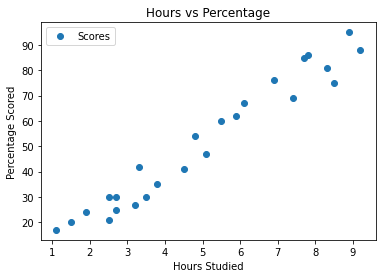

In [ ]:
data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()


# **Linear Regression Model**
## Splitting training and testing data

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)


**Training the model**

In [ ]:

from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_predict = linReg.predict(x_train)

**Training the Algorithm**

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Completed!!")

Training Completed!!




**Plotting the regression line**

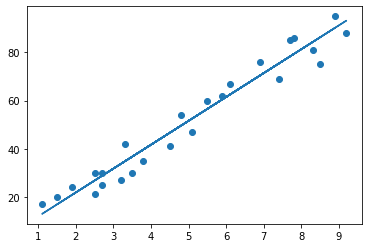

In [ ]:
line = regressor.coef_*x+regressor.intercept_
#plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

**Checking the accuracy for training and test sets**

In [ ]:
print("Test Score:")
print(regressor.score(x_test, y_test))
print("Training Score:")
print(regressor.score(x_train, y_train))

Test Score:
0.9454906892105354
Training Score:
0.9515510725211553


**Making Predicitons**

In [ ]:
print(x_test) #Testing data - in hours
y_predict = regressor.predict(x_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]



**Comparing Actual vs Predicted data**

In [ ]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



**Let's predict the score for 9.25 hours**

In [ ]:
print("Score of student who studied for 9.25 hours per day", regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours per day [93.69173249]



## **Model Evaluation Metrics**
Checking for efficiency of model 

In [ ]:

mean_sq_error = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
print("Mean Sqaured Error: ", mean_sq_error)
print("Mean Absolute Error: ", mean_abs_error)

Mean Sqaured Error:  21.598769307217456
Mean Absolute Error:  4.183859899002982


# **EDA**

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Correlation Matrix of Student Study Dataset')

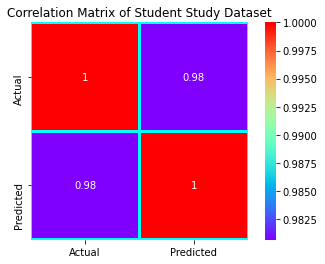

In [ ]:

sns.heatmap(df.corr(),cmap="rainbow",square=True,annot=True,linewidth=2,linecolor="aqua")
plt.title("Correlation Matrix of Student Study Dataset")

**Hours vs Score are Strongly Positively Correlated**

Text(0.5, 1.0, 'Distribution and Regression Plot of Dataset')

<Figure size 1440x1440 with 0 Axes>

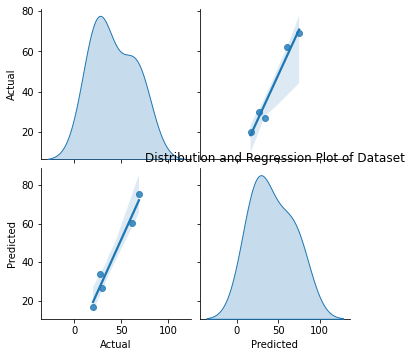

In [ ]:

# Seeing Distribution
plt.figure(figsize=(20,20))

sns.pairplot(data=df,kind="reg",diag_kind="kde")
plt.title("Distribution and Regression Plot of Dataset")

**Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:

# Training of Model

model = LinearRegression(normalize=True)
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Finding the Line of Regression

slope = model.coef_
intercp = model.intercept_
#  Equation of Line
#     y = mx  + c
#     m= slope , c = intercept
#
print("Slope : {} and Intercept : {}".format(slope[0],intercp))

Slope : 9.91065648064224 and Intercept : 2.018160041434662


In [ ]:
# Shwoing Concept Behind Linear Regression Predict() method in sklearn

def MyPredict(x):
    d = (slope*x  + interp).values
    prediction =pd.DataFrame(d,columns=["Scores"])
    return prediction

In [ ]:

# Same Using sklearn
y_pd = model.predict(x_test)
y_pd

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**We get 95% Accuracy**

In [ ]:
# Comparing Traing Vs Testing Accuracy
train_acc =  model.score(x_train,y_train)
test_acc  =  model.score(x_test,y_test)

print("Training Accuracy : ",train_acc*100)
print("Testing Accuracy : ",test_acc*100)

Training Accuracy :  95.15510725211553
Testing Accuracy :  94.54906892105353


**Prediction On Real Problem**

In [ ]:

hour = 9.25
score = model.predict([[hour]])
print("Score For Studying 9.25 hrs/day will be :  ",score[0])

Score For Studying 9.25 hrs/day will be :   93.69173248737539


In [ ]:
# Try for Differnt Values
hour = int(input("Enter the Hours You Study per Day : "))
score = model.predict([[hour]])
print("The Score of Your is : ",score[0])

Enter the Hours You Study per Day : 2
The Score of Your is :  21.839473002719142


## **Thanks For Watching.**